In [ ]:
from landlab import RasterModelGrid
from landlab.io import esri_ascii
from landlab.utils.add_halo import add_halo
import numpy as np
import rasterio
import rasterio.features
import rasterio.warp
from landlab import RasterModelGrid



In [3]:
dataset = rasterio.open('output_be.tif')


In [4]:
print(dataset)

<open DatasetReader name='output_be.tif' mode='r'>


In [ ]:
#Dataset band is array representing part of a variable's distribution.
dataset.width
dataset.height

1929

In [ ]:
dataset.bounds #wow this is where the dataset is located irl
dataset.transform #this is how the pixel locations in (col, row) were mapped to (x, y)
#The product of this matrix and (0, 0), the upper loeft (col, row) is the IRL location of the upper left corner
#OH WAIT HOLY COW THIS IS JUST ROTATION MATRIX + OFFSET
#These coordinates are from 
dataset.crs #shows how far things are from the mapping thing


Affine(1.0, 0.0, 278056.0,
       0.0, -1.0, 4173332.0)

In [67]:
#flow accumulator time
from landlab import RasterModelGrid
from landlab.components import FlowAccumulator, FastscapeEroder
with rasterio.open('output_be.tif') as src:
    band1 = dataset.read(1).astype(float)
    raster_grid = RasterModelGrid(band1.shape, 1)
    #So you HAVE to name these that otherwise it gets mad later on. 
    #its just convention so ima stick with it.
    z = raster_grid.add_field("topographic__elevation", band1.flatten(), at="node") #can also get spacial coords of the r,c dataset by .index(x, y)
flow_accumulator = FlowAccumulator(raster_grid, "topographic__elevation", flow_director="D8") #flow accumulator basically sets all of the nodes in the grid to point somewhere it is going to drain down.
eroder = FastscapeEroder(raster_grid, K_sp=0.001, m_sp=0.55, n_sp=1.1)

In [ ]:
for _ in range(20):
    flow_accumulator.run_one_step() #apparently landlab tried to make everything similar (ie all run one step)
    eroder.run_one_step(100) #the param is how many years it runs at once.
raster_grid.imshow('topographic__elevation')

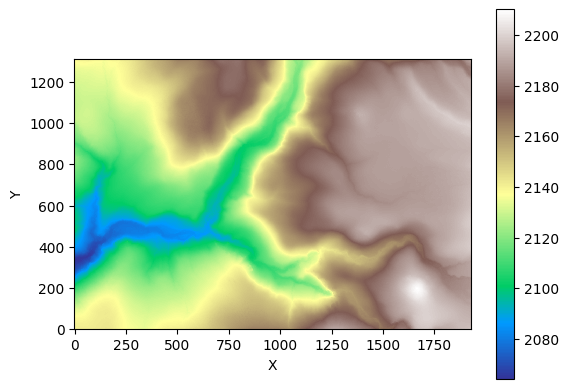

In [66]:
raster_grid_clean = RasterModelGrid(band1.shape, 1)
raster_grid_clean.add_field("topographic__elevation", band1.flatten(), at="node") #can also get spacial coords of the r,c dataset by .index(x, y)
raster_grid_clean.imshow("topographic__elevation", cmap="terrain")

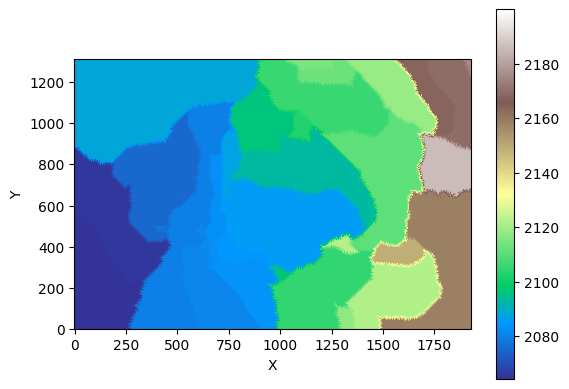

In [63]:
raster_grid.imshow("topographic__elevation", cmap="terrain")